In [1]:
import pandas as pd
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import numpy as np
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
!ls

1.ipynb  cyberbullying_tweets.csv  labeled_data.csv


In [3]:
!head cyberbullying_tweets.csv

tweet_text,cyberbullying_type
"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
"@Jason_Gio meh. :P  thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account.  Like Islam, it is all lies.",not_cyberbullying
"@Raja5aab @Quickieleaks Yes, the test of god is that good or bad or indifferent or weird or whatever, it all proves gods existence.",not_cyberbullying
Itu sekolah ya bukan tempat bully! Ga jauh kaya neraka,not_cyberbullying
Karma. I hope it bites Kat on the butt. She is just nasty. #mkr,not_cyberbullying
@stockputout everything but mostly my priest,not_cyberbullying


In [4]:
df = pd.read_csv('cyberbullying_tweets.csv')
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


# Data Preprocessing
+ Splitting Data into two classes (not_cyberbullying, cyberbullying[20 percent each])
+ Normalize the case-sensitiveness
+ Remove Special Characters
+ Remove URLS
+ Using lemmatizer in texts
+ Visualization after processing

In [5]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [6]:
listOfgenres = list(set(df['cyberbullying_type'].values))

In [7]:
listOfgenres

['not_cyberbullying',
 'religion',
 'age',
 'other_cyberbullying',
 'gender',
 'ethnicity']

In [8]:
for genre in listOfgenres:
    print(f'first 5 examples of {genre}')
    print(df[df['cyberbullying_type']==genre][:5])
    print()
    print()

first 5 examples of not_cyberbullying
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


first 5 examples of religion
                                              tweet_text cyberbullying_type
15918  Sudeep, did she invite him though? No right? W...           religion
15919  @discerningmumin Islam has never been a resist...           religion
15920  Boy, your comment about Journalists wanting to...           religion
15921  @ShashiTharoor @INCIndia Hindus were and are g...           religion
15922  White supremicists? How many do you know? Ther...           religion


first 5 examples of age
                 

In [9]:
df_all = df[df['cyberbullying_type']=='not_cyberbullying']

In [10]:
for genre in listOfgenres:
    if genre != 'not_cyberbullying':
        df_g = df[df['cyberbullying_type']==genre]
        df_all = pd.concat([df_all,df_g[:int(0.20*len(df_g))]])
df_all.reset_index(inplace=True,drop=True)

In [11]:
df_all['cyberbullying_type'].value_counts()

cyberbullying_type
not_cyberbullying      7945
religion               1599
age                    1598
gender                 1594
ethnicity              1592
other_cyberbullying    1564
Name: count, dtype: int64

In [12]:
from sklearn.utils import shuffle
shuffle(df_all).reset_index(inplace=True,drop=True)

In [13]:
df_all['cyberbullying_type'] = df_all['cyberbullying_type'].apply(lambda i:0 if i == 'not_cyberbullying' else 1)

In [14]:
df_all['cyberbullying_type'].value_counts()

cyberbullying_type
1    7947
0    7945
Name: count, dtype: int64

In [15]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df_all['tweet_text'] = df_all['tweet_text'].apply(remove_urls)

In [16]:
df_all['tweet_text'] = df_all['tweet_text'].str.lower()

In [17]:
df_all.head()

,tweet_text,cyberbullying_type
0,"in other words #katandandre, your food was cra...",0
1,why is #aussietv so white? #mkr #theblock #ima...,0
2,@xochitlsuckkks a classy whore? or more red ve...,0
3,"@jason_gio meh. :p thanks for the heads up, b...",0
4,@rudhoeenglish this is an isis account pretend...,0


In [18]:
!pip install nltk

In [19]:
from nltk.corpus import stopwords
import string
stopwords = set(stopwords.words('english'))
def remove_stopwords_and_punctuations(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return (" ".join([word for word in str(text).split() if word not in stopwords]))

df_all["tweet_text"] = df_all["tweet_text"].apply(lambda text: remove_stopwords_and_punctuations(text))
df_all.head()


,tweet_text,cyberbullying_type
0,words katandandre food crapilicious mkr,0
1,aussietv white mkr theblock imacelebrityau tod...,0
2,xochitlsuckkks classy whore red velvet cupcakes,0
3,jasongio meh p thanks heads concerned another ...,0
4,rudhoeenglish isis account pretending kurdish ...,0


In [20]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [21]:
def lemmatization(My_text):
    doc = nlp(My_text)
    return " ".join([token.lemma_ for token in doc])
df_all["tweet_text"] = df_all["tweet_text"].apply(lambda text: lemmatization(text))
df_all.head(5)

,tweet_text,cyberbullying_type
0,word katandandre food crapilicious mkr,0
1,aussietv white mkr theblock imacelebrityau tod...,0
2,xochitlsuckkks classy whore red velvet cupcake,0
3,jasongio meh p thank head concern another angr...,0
4,rudhoeenglish isis account pretend kurdish acc...,0


In [22]:
!pip install wordcloud

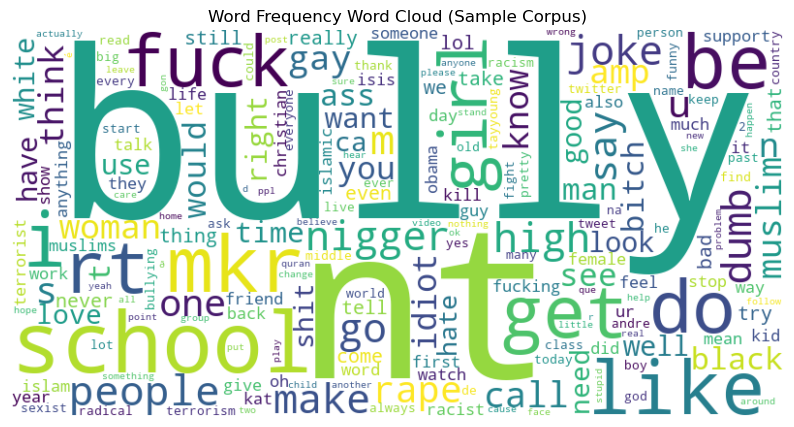

27511


In [23]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import re
corpus = df_all.tweet_text.tolist()[:]
words = re.findall(r'\b\w+\b', ' '.join(corpus).lower())
word_freq = Counter(words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Frequency Word Cloud (Sample Corpus)")
plt.show()
print(len(word_freq))

In [24]:
word_freq

Counter({'bully': 2963,
         'nt': 2437,
         'school': 2149,
         'mkr': 1797,
         'i': 1695,
         'be': 1610,
         'like': 1600,
         'do': 1554,
         'rt': 1493,
         'get': 1489,
         'fuck': 1410,
         'girl': 1243,
         'people': 1185,
         'joke': 1137,
         'nigger': 1126,
         'high': 1105,
         'dumb': 1095,
         'm': 1091,
         'go': 1066,
         'make': 1047,
         'say': 1021,
         'u': 989,
         'one': 958,
         's': 937,
         'rape': 907,
         'call': 880,
         'gay': 854,
         'think': 787,
         'woman': 773,
         'know': 763,
         'n': 753,
         'amp': 747,
         'muslim': 745,
         'idiot': 717,
         'would': 685,
         'see': 681,
         'you': 667,
         'black': 624,
         't': 611,
         'ass': 599,
         'man': 567,
         'bitch': 550,
         'right': 532,
         'time': 526,
         'want': 524,
         'g

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf_vectorizer = TfidfVectorizer()

In [27]:
df_all

,tweet_text,cyberbullying_type
0,word katandandre food crapilicious mkr,0
1,aussietv white mkr theblock imacelebrityau tod...,0
2,xochitlsuckkks classy whore red velvet cupcake,0
3,jasongio meh p thank head concern another angr...,0
4,rudhoeenglish isis account pretend kurdish acc...,0
...,...,...
15887,know sick viral video disgust racist call we n...,1
15888,ok fuck nigger big ass chrome rim cheap ass po...,1
15889,""" walken4gop nigger dumb "" fuck syria let go b...",1
15890,""" "" dumb fuck eyesz care contradict try least ...",1


In [28]:
X = df_all['tweet_text'].values
y = df_all['cyberbullying_type'].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = model.predict_proba(X_test_tfidf)[:,1] > 0.5
(y_pred == y_test).mean()

0.7971060081786725